In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_csv('POS_GAdelivery_serum.csv', index_col=0)
df = df.T
df.head()

sample_id,Full-term-1,Full-term-2,Full-term-3,Full-term-4,Full-term-5,Full-term-6,Full-term-7,Full-term-8,Full-term-9,Full-term-10,...,Pre-term-25,Pre-term-26,Pre-term-27,Pre-term-28,Pre-term-29,Pre-term-30,Pre-term-31,Pre-term-32,Pre-term-33,Pre-term-34
100.1120075,305140.2829,180650.47570,125324.1155,191367.9068,149277.0580,139327.0089,177294.06540,126520.3924,1.799014e+05,1.665206e+05,...,1.430140e+05,1.218116e+05,8.523326e+04,135464.1264,1.389978e+05,85736.03395,6.005459e+05,84744.34986,147620.3374,9.093287e+04
102.0913263,820111.1224,480826.55620,505103.6012,637296.1984,852915.2984,629739.5842,608251.33440,542273.9207,1.210025e+06,1.227076e+06,...,1.216818e+06,1.528309e+06,1.323123e+06,917939.1977,1.026654e+06,631932.80810,1.282836e+06,447358.42450,877595.4772,1.146457e+06
104.0706075,148453.3272,244127.08870,152712.0974,213512.5310,432157.3405,468413.0306,436994.04150,635600.9218,9.439966e+05,3.622757e+05,...,5.748476e+05,6.544233e+05,1.487372e+05,478628.8759,3.717400e+05,437900.69640,6.508621e+04,501214.61640,511144.9242,4.561554e+05
104.10694,173183.9320,63137.19441,112578.1890,109624.7052,230745.3874,221069.0287,95774.89188,274155.7309,6.837383e+05,2.728119e+05,...,3.238063e+05,3.393457e+05,2.543271e+05,314122.5311,1.532082e+05,208285.45710,9.827426e+04,240308.38070,379079.8579,3.872780e+05
110.0600525,172615.9882,262116.83070,255039.0970,221114.9973,303835.1828,202752.8322,252742.86850,145680.5938,3.431854e+05,2.870521e+05,...,2.322775e+05,3.453979e+05,2.718555e+05,381601.6086,3.325212e+05,269601.18280,2.035351e+05,417689.14690,261047.2824,3.014830e+05


In [39]:
dfH = df.loc[:, 'Full-term-1':'Pre-term-34']
dfH = np.log10(dfH)
dfH_urine = dfH.loc[:, dfH.columns.str.contains('Full-term')]
dfH_serum = dfH.loc[:, dfH.columns.str.contains('Pre-term')]

In [40]:
col_names = dfH.columns.values
col_namesDF = pd.DataFrame(col_names, columns =['samples'])
col_namesDF['species'] = np.where(col_namesDF['samples'].str.contains('Full-term'), 'orange','dodgerblue')
col_namesDF = col_namesDF.set_index('samples')
col_namesDF

,species
samples,
Full-term-1,orange
Full-term-2,orange
Full-term-3,orange
Full-term-4,orange
Full-term-5,orange
...,...
Pre-term-30,dodgerblue
Pre-term-31,dodgerblue
Pre-term-32,dodgerblue


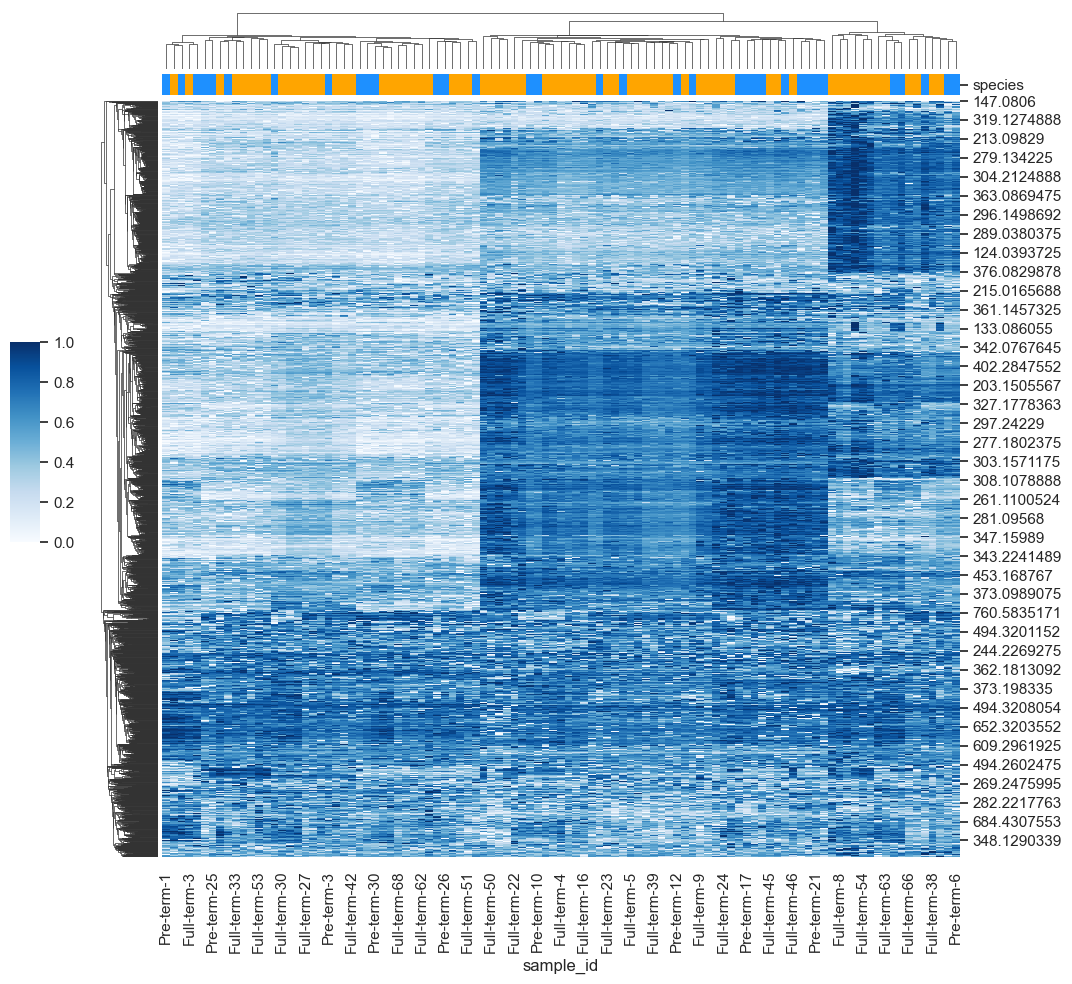

In [41]:
sns.set(font_scale=1)
g = sns.clustermap(dfH, cmap='Blues', col_colors=col_namesDF,
                       colors_ratio=(0.025, 0.025), standard_scale=0,
                       dendrogram_ratio=0.07, cbar_pos=(-0.07, .45, .03, .2))


In [29]:
g.savefig('NEG_clustermap_urine', dpi=300)